In [1]:
# Import libraries
import numpy as np
import pandas as pd

# Import data
dogs = pd.read_csv('dog_data.csv')

# Subset to just whippets, terriers, and pitbulls
dogs_wtp = dogs[dogs.breed.isin(['whippet', 'terrier', 'pitbull'])]

# Subset to just poodles and shihtzus
dogs_ps = dogs[dogs.breed.isin(['poodle', 'shihtzu'])]

In [2]:
dogs.head()

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
0,0,6,2.25,2,black,1,0,Huey,chihuahua
1,0,4,5.36,4,black,0,0,Cherish,chihuahua
2,0,7,3.63,3,black,0,1,Becka,chihuahua
3,0,5,0.19,2,black,0,0,Addie,chihuahua
4,0,5,0.37,1,black,1,1,Beverlee,chihuahua


In [3]:
whippet_rescue = dogs.is_rescue[dogs["breed"] == 'whippet']
num_whippet_rescues = np.sum(whippet_rescue == 1)
num_whippet_rescues

6

In [4]:
num_whippets = len(whippet_rescue)
num_whippets

100

In [5]:
from scipy.stats import binom_test
pval = binom_test(x = num_whippet_rescues, n = num_whippets, p = 0.08)
pval

/var/folders/gp/z7c4652d4dn7qywk191zpjtr0000gn/T/ipykernel_947/1997070534.py:2: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  pval = binom_test(x = num_whippet_rescues, n = num_whippets, p = 0.08)


0.5811780106238111

In [6]:
wt_whippets = dogs.weight[dogs.breed == 'whippet']
wt_terriers = dogs.weight[dogs.breed == 'terrier']
wt_pitbulls = dogs.weight[dogs.breed == 'pitbull']

In [7]:
from scipy.stats import f_oneway
fstat, pval = f_oneway(wt_pitbulls,wt_terriers,wt_whippets)
pval

3.276415588274815e-17

<Axes: >

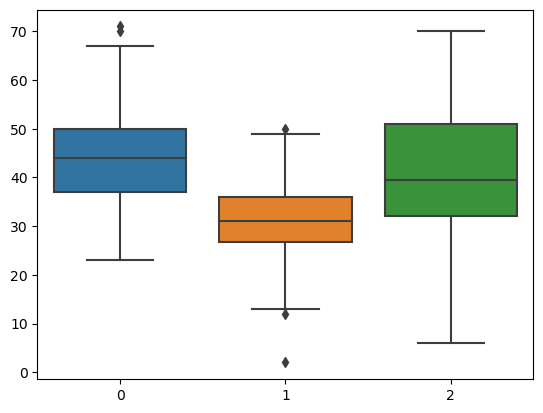

In [15]:
import seaborn as sns
sns.boxplot((wt_pitbulls,wt_terriers,wt_whippets))

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
results = pairwise_tukeyhsd(dogs_wtp.weight, dogs_wtp.breed, 0.05)
print(results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
pitbull terrier   -13.24    0.0 -16.7278 -9.7522   True
pitbull whippet    -3.34 0.0638  -6.8278  0.1478  False
terrier whippet      9.9    0.0   6.4122 13.3878   True
-------------------------------------------------------


In [11]:
Xtab = pd.crosstab(dogs_ps.color, dogs_ps.breed)
Xtab

breed,poodle,shihtzu
color,,
black,17,10
brown,13,36
gold,8,6
grey,52,41
white,10,7


In [12]:
from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency(Xtab)
pval

0.005302408293244593